In [1]:
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.optim as optim

In [2]:
train_dataset=torchvision.datasets.FashionMNIST(root='./data',train=True,download=True,transform=transforms.ToTensor())

In [3]:
train_dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [4]:

test_dataset=torchvision.datasets.FashionMNIST(root='./data',train=False,download=True,transform=transforms.ToTensor())

In [5]:
test_dataset

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [6]:
len(test_dataset[1])

2

In [7]:
train_loader = DataLoader(train_dataset, batch_size=64,shuffle=True )

In [8]:
class net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1=nn.Linear(28*28,1000)
        self.fc2=nn.Linear(1000,2000)
        self.fc3=nn.Linear(2000,10)
        self.sigm=nn.Sigmoid()
    def forward(self,x):
        x=self.sigm(self.fc1(x))
        x=self.sigm(self.fc2(x))
        x=self.fc3(x)
        return x
        

In [9]:
enc=net()

In [10]:
class net2(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1=nn.Linear(10,100)
        self.fc2=nn.Linear(100,200)
        self.fc3=nn.Linear(200,28*28)
        self.sigm=nn.Sigmoid()

    def forward(self,x):
        x=self.sigm(self.fc1(x))
        x=self.sigm(self.fc2(x))
        x=self.fc3(x)
        return x

In [11]:
dec=net2()

In [12]:
criterion=nn.MSELoss()

In [13]:
optimizer=optim.Adam(list(enc.parameters())+list(dec.parameters()),lr=0.001)

In [14]:
epoch=5

In [15]:
for i in range(epoch):
    for x,y in train_loader:
        bthsize=len(x)
        x=x.view(bthsize,1,-1)
        latentspace=enc(x)
        out=dec(latentspace)
        loss=criterion(out,x)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        print(loss)

tensor(0.2804, grad_fn=<MseLossBackward0>)
tensor(0.2322, grad_fn=<MseLossBackward0>)
tensor(0.1767, grad_fn=<MseLossBackward0>)
tensor(0.1388, grad_fn=<MseLossBackward0>)
tensor(0.1359, grad_fn=<MseLossBackward0>)
tensor(0.1118, grad_fn=<MseLossBackward0>)
tensor(0.0977, grad_fn=<MseLossBackward0>)
tensor(0.0978, grad_fn=<MseLossBackward0>)
tensor(0.0991, grad_fn=<MseLossBackward0>)
tensor(0.0963, grad_fn=<MseLossBackward0>)
tensor(0.0952, grad_fn=<MseLossBackward0>)
tensor(0.0979, grad_fn=<MseLossBackward0>)
tensor(0.0981, grad_fn=<MseLossBackward0>)
tensor(0.1010, grad_fn=<MseLossBackward0>)
tensor(0.1027, grad_fn=<MseLossBackward0>)
tensor(0.0940, grad_fn=<MseLossBackward0>)
tensor(0.0872, grad_fn=<MseLossBackward0>)
tensor(0.0872, grad_fn=<MseLossBackward0>)
tensor(0.0930, grad_fn=<MseLossBackward0>)
tensor(0.0969, grad_fn=<MseLossBackward0>)
tensor(0.0895, grad_fn=<MseLossBackward0>)
tensor(0.0871, grad_fn=<MseLossBackward0>)
tensor(0.0880, grad_fn=<MseLossBackward0>)
tensor(0.08

In [16]:
train_dataset[2][0].shape

torch.Size([1, 28, 28])

In [17]:
try1=torch.tensor(train_dataset[0][0])


C:\Users\vatsal.singh\AppData\Local\Temp\ipykernel_29672\1805930138.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  try1=torch.tensor(train_dataset[0][0])


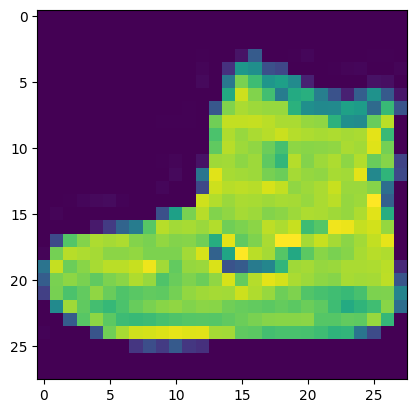

In [18]:
plt.imshow(train_dataset[0][0].view(28,28))

In [128]:

latspace=enc(try1.view(28*28))

In [129]:
arr=[10,1,1,1,12,1,1,1,20,10]

In [130]:
len(arr)

10

In [131]:
arr=torch.tensor(arr,dtype=torch.float32)

In [132]:
#latspace=arr

In [133]:
latspace

tensor([-14.6999,   6.6261,  -4.1573,  -8.7993,  12.0485,  -2.4168,   7.6678,
          3.8206,   2.8868,  -3.6188], grad_fn=<ViewBackward0>)

In [134]:
out=dec(latspace)

In [135]:
npout=np.array(out.detach())

C:\Users\vatsal.singh\AppData\Local\Temp\ipykernel_29672\557141441.py:1: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  npout=np.array(out.detach())


In [136]:
npout=npout.reshape(28,28)

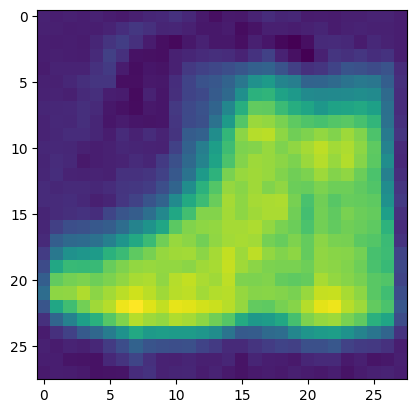

In [137]:
plt.imshow(npout)